In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#%matplotlib inline
import importlib

sys.path.append('/home/bastien/Documents/StageCMM/Mathematical_Morphologies_And_Deep_Learning/SourceCode')
from shallowAE import ShallowAE
import bastien_utils
import custom_regularizers
import morphoMaths

/home/bastien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_train, y_train, x_test, y_test = bastien_utils.load_data(FILE_PATH, train=True, test=True)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
x_small, y_small = bastien_utils.load_data(FILE_PATH, train=False, test=False, subsetTest=True)

## 1. Simple Shallow AE

Shallow AE, sigmoid activation in encoder, lRELU activation in decoder, MSE loss.

## 2.1 No AMD: Repeating the original image 6 times

In [4]:
x_train = np.tile(x_train, (1,1,1,6))

In [5]:
x_train.shape

(60000, 28, 28, 6)

AE_noAMD_ch6 = ShallowAE(latent_dim=100, n_channels=6)

In [3]:
AE_noAMD_ch6 = ShallowAE.load(model_name='18_07_11_dim100.h5', path_to_model_directory='../ShallowAE/SeveralChannels/NoAMD/')

In [6]:
AE_noAMD_ch6.train(x_train, nb_epochs=100, X_val=np.tile(x_test, (1,1,1,6)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 41s 690us/step - loss: 0.0150 - val_loss: 0.0150
Epoch 2/100
60000/60000 [==============================] - 43s 713us/step - loss: 0.0150 - val_loss: 0.0150
Epoch 3/100
60000/60000 [==============================] - 41s 687us/step - loss: 0.0149 - val_loss: 0.0149
Epoch 4/100
60000/60000 [==============================] - 41s 687us/step - loss: 0.0148 - val_loss: 0.0149
Epoch 5/100
60000/60000 [==============================] - 43s 722us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 6/100
60000/60000 [==============================] - 43s 716us/step - loss: 0.0147 - val_loss: 0.0147
Epoch 7/100
60000/60000 [==============================] - 44s 726us/step - loss: 0.0147 - val_loss: 0.0147
Epoch 8/100
60000/60000 [==============================] - 45s 746us/step - loss: 0.0146 - val_loss: 0.0146
Epoch 9/100
60000/60000 [==============================] - 39s 644us/step - loss: 0.01

Epoch 76/100
60000/60000 [==============================] - 38s 639us/step - loss: 0.0120 - val_loss: 0.0121
Epoch 77/100
60000/60000 [==============================] - 38s 639us/step - loss: 0.0120 - val_loss: 0.0121
Epoch 78/100
60000/60000 [==============================] - 39s 644us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 79/100
60000/60000 [==============================] - 38s 639us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 80/100
60000/60000 [==============================] - 39s 650us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 81/100
60000/60000 [==============================] - 39s 645us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 82/100
60000/60000 [==============================] - 38s 640us/step - loss: 0.0119 - val_loss: 0.0119
Epoch 83/100
60000/60000 [==============================] - 39s 642us/step - loss: 0.0119 - val_loss: 0.0119
Epoch 84/100
60000/60000 [==============================] - 39s 642us/step - loss: 0.0118 - val_loss: 0.0119
Epoch 85/100
60000/

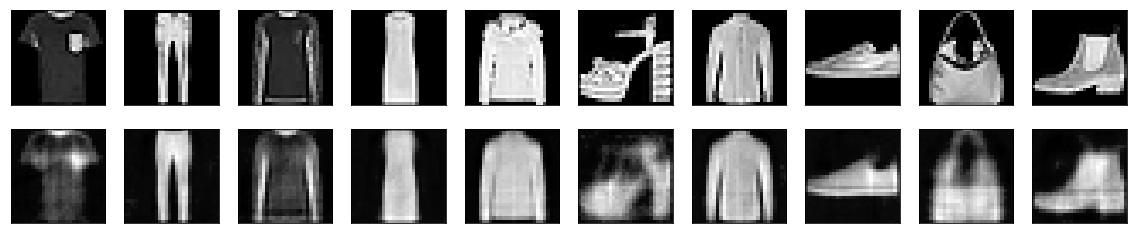

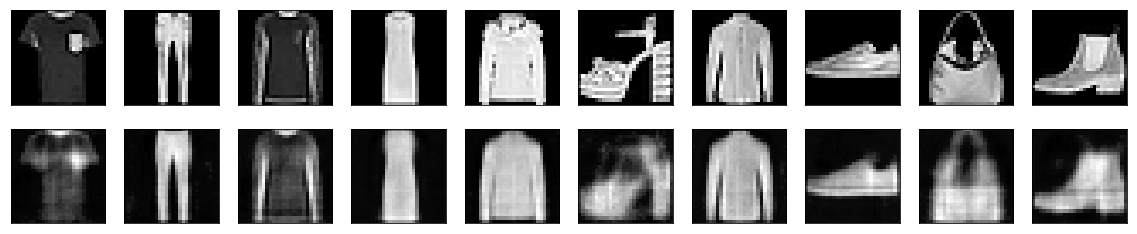

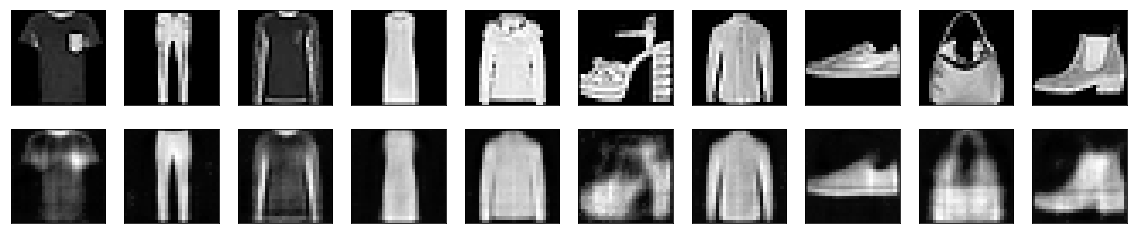

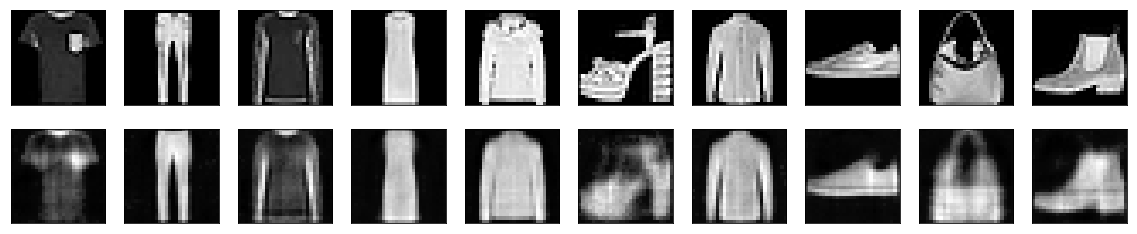

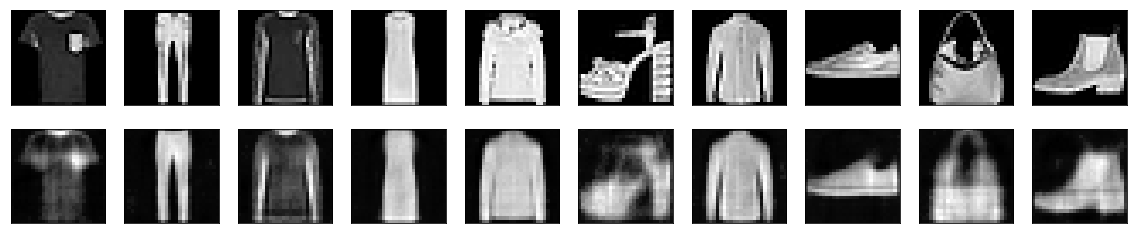

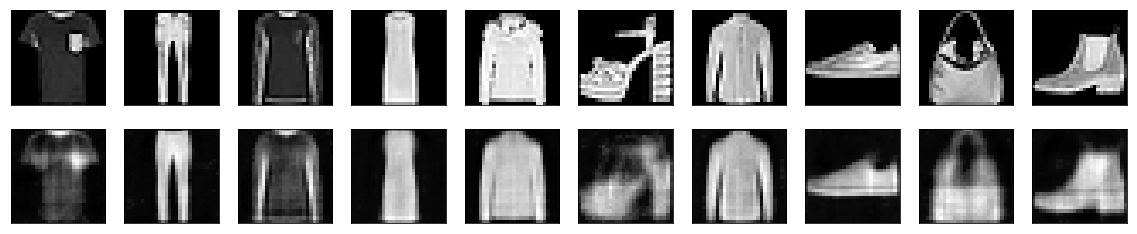

In [9]:
for i in range(6):
    AE_noAMD_ch6.plot_reconstructions(np.tile(x_small, (1,1,1,6)), channel_to_plot=i)

In [10]:
print('Training reconstruction error: ', AE_noAMD_ch6.reconstruction_error(x_train))
print('Test reconstruction error: ', AE_noAMD_ch6.reconstruction_error(np.tile(x_test, (1,1,1,6))))

Training reconstruction error:  0.01146137822965781
Test reconstruction error:  0.011523129019141197


AE_noAMD_ch6.save(path_to_model_directory='../ShallowAE/SeveralChannels/NoAMD/')

**Let us compare with the AE taking as input the images only once.**

In [11]:
AE_simple = ShallowAE.load('18_07_09_dim100.h5')

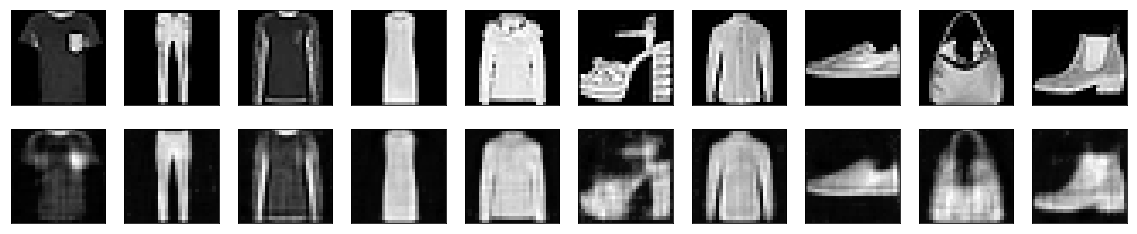

In [12]:
AE_simple.plot_reconstructions(x_small)

In [13]:
print('Test reconstruction error: ', AE_simple.reconstruction_error(x_test))

Test reconstruction error:  0.008433725187182427


The AE reconstruction is not better when replicating the input image 6 times, maybe the huge increase in capacity needs more epochs to train.

## 2.2 AMD added to the original image

In [14]:
x_train = morphoMaths.AMD_in_one_array(x_train[:,:,:,0])

In [15]:
x_test = morphoMaths.AMD_in_one_array(x_test[:,:,:,0])

In [16]:
x_train.shape

(60000, 28, 28, 6)

In [5]:
AE_AMD_ch6 = ShallowAE(latent_dim=100, n_channels=6)

In [6]:
AE_noAMD_ch6.train(morphoMaths.AMD_in_one_array(x_train[:,:,:,0]), nb_epochs=200, X_val=morphoMaths.AMD_in_one_array(x_test[:,:,:,0]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
  512/60000 [..............................] - ETA: 21:12 - loss: 0.0615

/home/bastien/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158367). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 48s 802us/step - loss: 0.0323 - val_loss: 0.0235
Epoch 2/200
60000/60000 [==============================] - 38s 632us/step - loss: 0.0227 - val_loss: 0.0219
Epoch 3/200
60000/60000 [==============================] - 38s 632us/step - loss: 0.0211 - val_loss: 0.0199
Epoch 4/200
60000/60000 [==============================] - 38s 629us/step - loss: 0.0189 - val_loss: 0.0178
Epoch 5/200
60000/60000 [==============================] - 38s 625us/step - loss: 0.0173 - val_loss: 0.0167
Epoch 6/200
60000/60000 [==============================] - 38s 627us/step - loss: 0.0164 - val_loss: 0.0160
Epoch 7/200
60000/60000 [==============================] - 38s 633us/step - loss: 0.0158 - val_loss: 0.0154
Epoch 8/200
60000/60000 [==============================] - 38s 626us/step - loss: 0.0152 - val_loss: 0.0148
Epoch 9/200
60000/60000 [==============================] - 38s 628us/step - loss: 0.0146 - val_loss: 0.0143
Epoch 10/200
60000/60000 [==============

Epoch 151/200
60000/60000 [==============================] - 40s 669us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 152/200
60000/60000 [==============================] - 40s 667us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 153/200
60000/60000 [==============================] - 40s 670us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 154/200
60000/60000 [==============================] - 40s 667us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 155/200
60000/60000 [==============================] - 40s 671us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 156/200
60000/60000 [==============================] - 41s 680us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 157/200
60000/60000 [==============================] - 41s 684us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 158/200
60000/60000 [==============================] - 40s 670us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 159/200
60000/60000 [==============================] - 40s 671us/step - loss: 0.0052 - val_loss: 0.0052
Epoch 160/

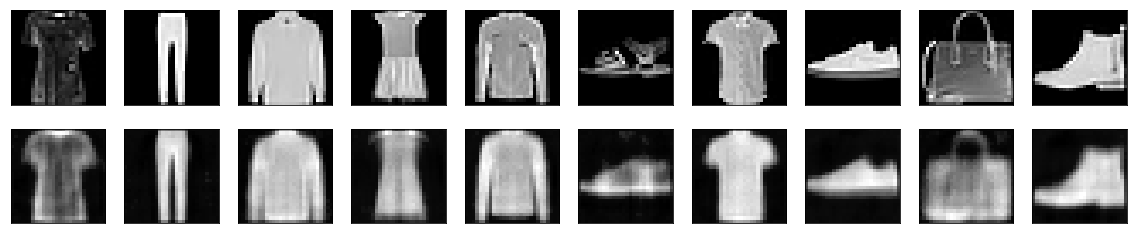

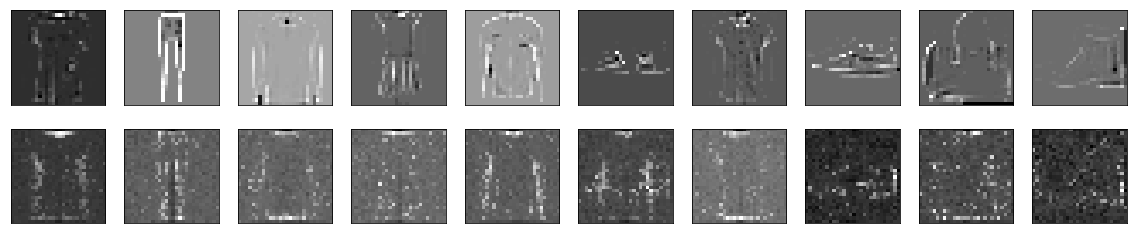

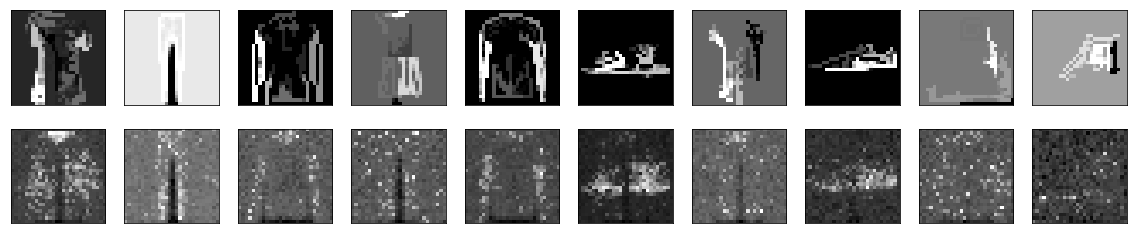

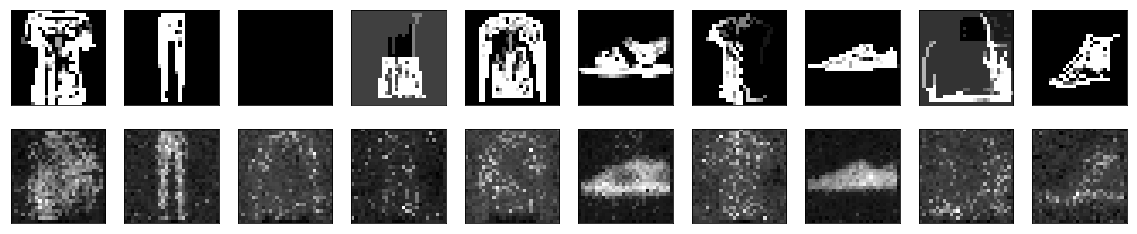

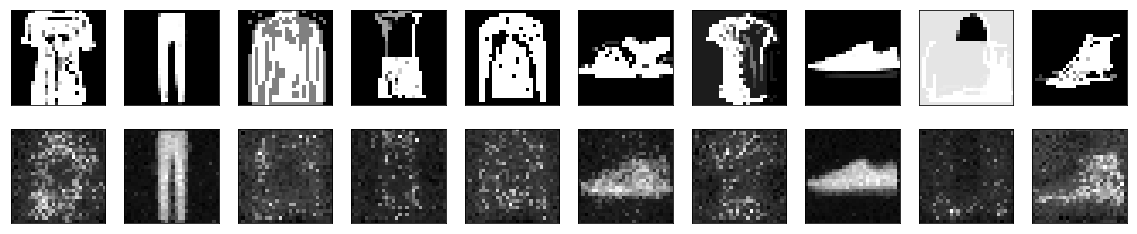

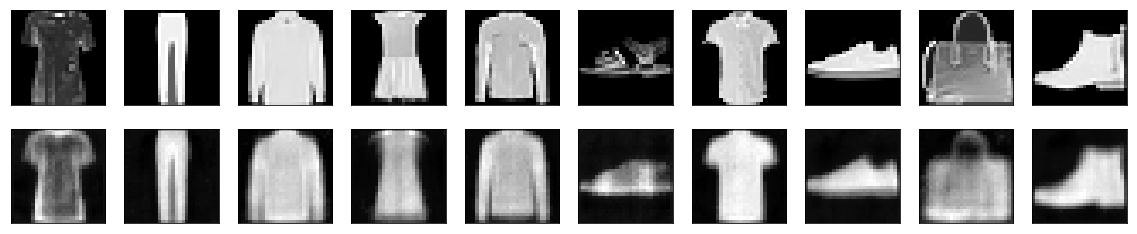

In [7]:
for i in range(6):
    AE_noAMD_ch6.plot_reconstructions(morphoMaths.AMD_in_one_array(x_small[:,:,:,0]), channel_to_plot=i)

In [ ]:
print('Training reconstruction error: ', AE_noAMD_ch6.reconstruction_error(morphoMaths.AMD_in_one_array(x_train[:,:,:,0]))
print('Test reconstruction error: ', AE_noAMD_ch6.reconstruction_error(morphoMaths.AMD_in_one_array(x_test[:,:,:,0]))